<a href="https://colab.research.google.com/github/ShreyaAN10/LearnDeepLearning/blob/main/NonLinearNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

## Creating a dataset

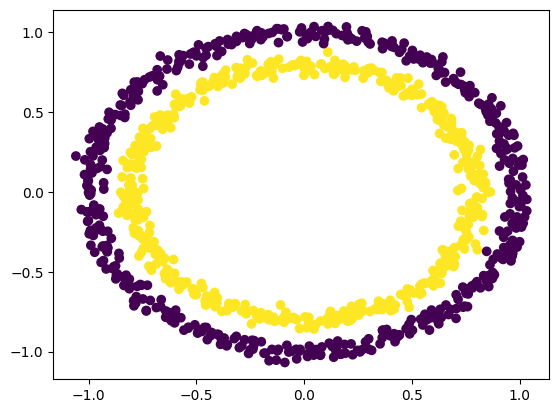

In [2]:
n_samples = 1000

X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Convert inputs to tensors

In [3]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Setup device agnostic code

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Building a non-linear model

In [5]:
class nonlinearmodel(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer1 = nn.Linear(in_features=2, out_features=20)
    self.layer2 = nn.Linear(in_features=20, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # a non-linear activation function
    self.tanh = nn.Tanh()

  def forward(self, x):
    return self.layer3(self.tanh(self.layer2(self.tanh(self.layer1(x)))))

model = nonlinearmodel().to(device)


In [6]:
model

nonlinearmodel(
  (layer1): Linear(in_features=2, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
)

## Initialize loss and optimizer

In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

def accuracy_fn(pred, actual):
  correct = torch.eq(pred, actual).sum().item()
  acc = (correct / len(pred)) * 100
  return acc

In [8]:
def plot_convergence(epochs,
                     loss,
                     test_loss):
  plt.plot(epochs, torch.Tensor(loss).detach().numpy(), label="Training Loss")
  plt.plot(epochs, torch.Tensor(test_loss).detach().numpy(), label="Training Accuracy")
  plt.legend()
  plt.show()

## Training

In [9]:
epochs = 2000
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(test_preds, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} \n Training: Loss {loss:.2f} Accuracy {accuracy:.2f} | Testing: Loss {test_loss:.2f} Accuracy {test_accuracy:.2f}")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)


Epoch: 0 
 Training: Loss 0.70 Accuracy 50.00 | Testing: Loss 0.70 Accuracy 50.00
Epoch: 10 
 Training: Loss 0.69 Accuracy 47.88 | Testing: Loss 0.70 Accuracy 44.50
Epoch: 20 
 Training: Loss 0.69 Accuracy 50.75 | Testing: Loss 0.70 Accuracy 46.50
Epoch: 30 
 Training: Loss 0.69 Accuracy 51.88 | Testing: Loss 0.70 Accuracy 47.50
Epoch: 40 
 Training: Loss 0.69 Accuracy 52.62 | Testing: Loss 0.70 Accuracy 48.50
Epoch: 50 
 Training: Loss 0.69 Accuracy 52.88 | Testing: Loss 0.70 Accuracy 49.50
Epoch: 60 
 Training: Loss 0.69 Accuracy 52.88 | Testing: Loss 0.70 Accuracy 51.50
Epoch: 70 
 Training: Loss 0.69 Accuracy 54.12 | Testing: Loss 0.70 Accuracy 51.00
Epoch: 80 
 Training: Loss 0.69 Accuracy 54.62 | Testing: Loss 0.70 Accuracy 51.00
Epoch: 90 
 Training: Loss 0.69 Accuracy 55.38 | Testing: Loss 0.69 Accuracy 50.00
Epoch: 100 
 Training: Loss 0.69 Accuracy 55.50 | Testing: Loss 0.69 Accuracy 50.50
Epoch: 110 
 Training: Loss 0.69 Accuracy 56.38 | Testing: Loss 0.69 Accuracy 49.50
Epo

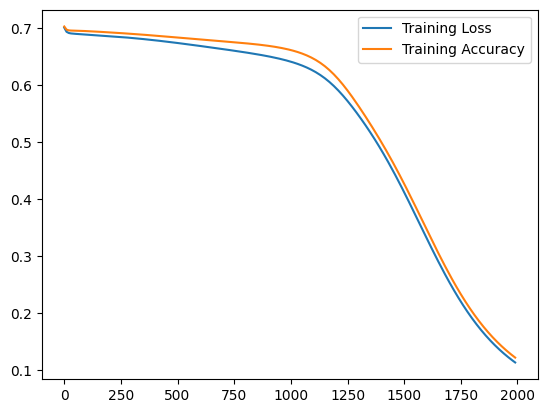

In [10]:
plot_convergence(epoch_count, loss_values, test_loss_values)

## Evaluating the model

In [11]:
# make predictions

model.eval()
with torch.inference_mode():
  y_inferred = torch.round(torch.sigmoid(model(X_test))).squeeze()

# let's manually evaluate how close our predictions are to y_test
print(f"Actual values: \t {y_test[:10]}")
print(f"Our predictions: {y_inferred[:10]}")

Actual values: 	 tensor([0., 0., 1., 0., 0., 1., 0., 0., 1., 1.])
Our predictions: tensor([0., 0., 1., 0., 0., 1., 0., 0., 1., 1.])


In [12]:
import requests
from pathlib import Path

# download PotDecisionBoudnaries from Learn PyTorch repo only if it doesn't already exist
if Path("PlotDecisionBoundaries.ipynb").is_file():
  print("exists")
else:
  print("Downloading...")
  # request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/ShreyaAN10/LearnDeepLearning/main/plotdecisionboundaries.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundaries

Downloading...


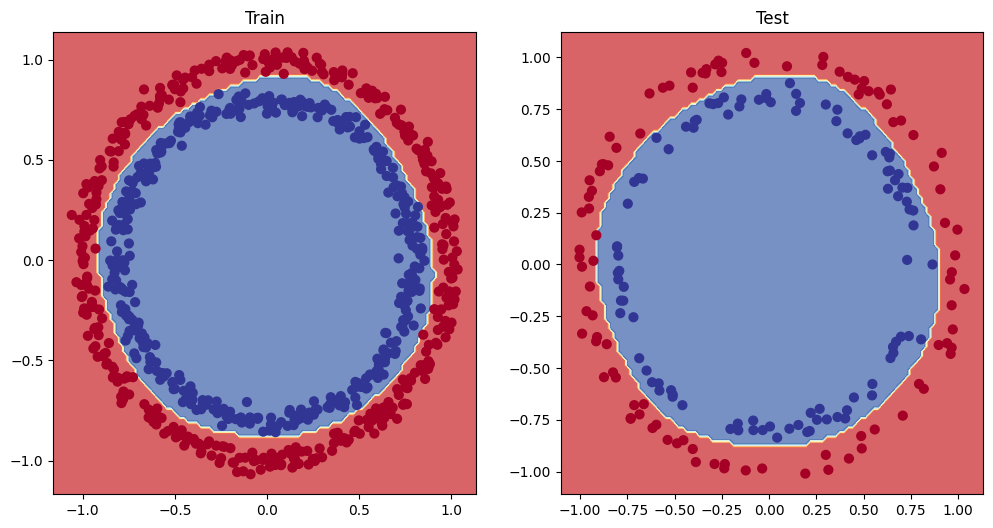

In [13]:
# plot decision boundaries for better visualization
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundaries(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundaries(model, X_test, y_test)